# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Luthfi Mahendra Widiarto]
- **Email:** [lmahendraw@gmail.com]
- **ID Dicoding:** [luthfi_mahendra]

## Menentukan Pertanyaan Bisnis

- Pada musim apa jumlah pengguna sepeda paling banyak?
- Pada bulan apa jumlah pengguna sepeda paling banyak dan apa faktor penyebabnya? 


## Import Semua Packages/Library yang Digunakan

In [3]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.switch_backend('TkAgg')
%matplotlib inline

## Data Wrangling

### Gathering Data

In [4]:
#load dataset day.csv dan hour.csv
day = pd.read_csv('day.csv')
day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#load dataset hour.csv
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv memiliki 16 kolom dengan masing-masing nama label : instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt.
- Dataset hour.csv memiliki 17 kolom dengan masing-masing namaa label : instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt.

### Assessing Data

**Assessing terhadap Dataset day.csv**

In [6]:
day.info()
day.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Penjelasan langkah di atas** 

- day.info() digunakan untuk mengecek jumlah baris dalam dataset, tipe data setiap kolom dataset, dan jumlah kolom.
- day.isna().sum() digunakan untuk mengecek  nilai yang hilang dalam dataset

In [7]:
print(f'Jumlah duplikasi data dalam dataset day.csv : {day.duplicated().sum()}')

Jumlah duplikasi data dalam dataset day.csv : 0


**Penjelasan langkah di atas** 

- Step diatas digunakan untuk melihat adanya duplikasi data dalam data day.csv

In [8]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Penjelasan langkah di atas** 

- day.describe() digunakan untuk melihat statistik deskriptif dari dataset day.csv()

**Assessing terhadap Dataset hour.csv**

In [9]:
hour.info()
hour.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Penjelasan langkah di atas** 

- hour.info() digunakan untuk mengecek jumlah baris dalam dataset, tipe data setiap kolom dataset, dan jumlah kolom.
- hour.isna().sum() digunakan untuk mengecek  nilai yang hilang dalam dataset

In [10]:
print(f'Jumlah duplikasi data dalam dataset hour.csv : {hour.duplicated().sum()}')

Jumlah duplikasi data dalam dataset hour.csv : 0


**Penjelasan langkah di atas** 

- Step diatas digunakan untuk melihat adanya duplikasi data dalam data hour.csv

In [11]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Penjelasan langkah di atas** 

- hour.describe() digunakan untuk melihat statistik deskriptif dari dataset hour.csv()

**Insight:**

**Dataset day.csv**
- Dataset day.csv memiliki 731 baris dan 16 kolom.
- Dataset day.csv tidak memiliki baris nilai yang hilang.
- Kesalahan format tipe data kolom dteday, seharusnya dalam format datetime bukan object.
- Dalam dataset day.csv tidak ada data yang terduplikasi.
- Berdasarkan statistik deskriptif, terdapat 4 musim di dalam dataset tersebut.
- Berdasarkan statistik deskriptif, data tersebut di ambil dari tanggal 2011-01-01 hingga 2012-12-31.
- Berdasarkan statistik deskriptif, rata-rata penyewa sepeda dalam 1 hari sebanyak 4504 penyewa.

**Dataset hour.csv**
- Dataset hour.csv memiliki 17379 baris dan 17 kolom.
- Dataset hour.csv memiliki kolom dengan label 'hr', sedangkan day.csv tidak. Ini membuat dataset hour.csv memiliki informasi yang lebih detail.
- Dataset hour.csv tidak memiliki baris nilai yang hilang.
- Kesalahan format tipe data kolom dteday, seharusnya dalam format datetime bukan object.
- Dalam dataset hour.csv tidak ada data yang terduplikasi.
- Berdasarkan statistik deskriptif, terdapat 4 musim di dalam dataset tersebut.
- Berdasarkan statistik deskriptif, data tersebut di ambil dari pukul 11.55 AM - 23 PM.
- Berdasarkan statistik deskriptif, rata-rata penyewa sepeda dalam 1 jam sebanyak 189 penyewa.
- Berdasarkan statistik deskriptif, rata-rata penyewa menyewa sepeda diantara season 2 dan 3

### Cleaning Data

**Cleaning dataset day.csv dan hour.csv**

In [12]:
#merubah format object menjadi datetime 
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])
day.info()

hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Penjelasan langkah di atas** 

- Langkah diatas digunakan untuk mengganti tipe data yang semula object menjadi datetime pada kolom dteday

**Insight:**
- Semua tipe data pada masing-masing kolom dataset day.csv dan hour.csv sudah sesuai dengan labelnya

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
season_usage = day.groupby('season')['cnt'].sum().reset_index()
print(season_usage)

   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


**Penjelasan langkah di atas** 

- Diambil variabel 'season' dan 'cnt' untuk mengetahui jumlah penyewa sepeda terbanyak pada season apa saja. 
- Dilakukan pengelompokkann menggunakan function gurpby, dengan indikator 'season' untuk memperoleh total penyewa sepeda pada variabel 'cnt' untuk setiap musim.

In [14]:
month_usage = day.groupby('mnth')['cnt'].sum().reset_index()
print(month_usage)

    mnth     cnt
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


**Penjelasan langkah di atas** 

- Diambil variabel 'mnth' dan 'cnt' untuk mengetahui jumlah penyewa sepeda terbanyak pada bulan apa saja.
- Dilakukan pengelompokkan menggunakan function grupby, dengan indikator 'mnth' untuk memperoleh total penyewa sepeda pada variabel 'cnt' untuk setiap bulannya.

In [15]:
hour = hour.drop(columns= ['instant', 'yr', 'hr',	'holiday', 'weekday', 'workingday',	'atemp', 'hum',	 'casual',	'registered'])
hour.head()


,dteday,season,mnth,weathersit,temp,windspeed,cnt
0,2011-01-01,1,1,1,0.24,0.0,16
1,2011-01-01,1,1,1,0.22,0.0,40
2,2011-01-01,1,1,1,0.22,0.0,32
3,2011-01-01,1,1,1,0.24,0.0,13
4,2011-01-01,1,1,1,0.24,0.0,1


**Penjelasan langkah di atas**
- Cell di atas digunakan untuk mengambil kolom yang diperlukan saja saat analisis data

In [16]:
kombinasi = pd.concat([season_usage,month_usage,hour],axis=1)
season_usage.to_csv('season_usage_clean', index= False)
month_usage.to_csv('month_usage_clean', index= False)
hour.to_csv('hour_clean', index=False)

**Penjelasan langkah di atas**
- Cell di atas digunakan untuk menampilkan data yang sudah clean untuk divisualisasikan.

In [14]:
correlation_table = day[['mnth', 'cnt', 'temp', 'weathersit', 'windspeed','season']].corr()
print(correlation_table)

                mnth       cnt      temp  weathersit  windspeed    season
mnth        1.000000  0.279977  0.220205    0.043528  -0.207502  0.831440
cnt         0.279977  1.000000  0.627494   -0.297391  -0.234545  0.406100
temp        0.220205  0.627494  1.000000   -0.120602  -0.157944  0.334315
weathersit  0.043528 -0.297391 -0.120602    1.000000   0.039511  0.019211
windspeed  -0.207502 -0.234545 -0.157944    0.039511   1.000000 -0.229046
season      0.831440  0.406100  0.334315    0.019211  -0.229046  1.000000


**Penjelasan langkah di atas** 

- Diambil variabel 'temp', 'windspeed', 'weathersit', dan 'season' untuk mengetahui nilai korelasi dari ketiga variabel tersebut terhadap banyaknya penyewa sepeda.
- Dilakukan pengelompokkan menggunakan function grupby, dengan indikator 'mnth' untuk memperoleh total penyewa sepeda pada variabel 'cnt' untuk setiap bulannya.

**Insight:**
- Urutan intensitas penyewa sepeda paling banyak di bulan ke-8, ke-6, ke-9, ke-7.
- Intensitas penyewa sepeda paling sedikit di bulan ke-1 dan ke-2.
- Terdapat korelasi positif yang kuat antara jumlah penggunaan (cnt) dan suhu (temp), yang menunjukkan bahwa saat suhu meningkat, jumlah penggunaan juga cenderung meningkat.
- Terdapat korelasi negatif antara jumlah penggunaan (cnt) dan kondisi cuaca (weathersit). Ini menunjukkan bahwa kondisi cuaca yang buruk cenderung mengurangi jumlah penggunaan.
- Terdapat korelasi negatif antara jumlah penggunaan (cnt) dan kecepatan angin (windspeed). Ini berarti saat kecepatan angin meningkat, jumlah penggunaan cenderung menurun.
- Terdapat korelasi positif antara jumlah penggunaan (cnt) dan musim (season). Ini berarti bahwa musim tertentu (mungkin musim semi atau musim panas) cenderung meningkatkan jumlah penggunaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

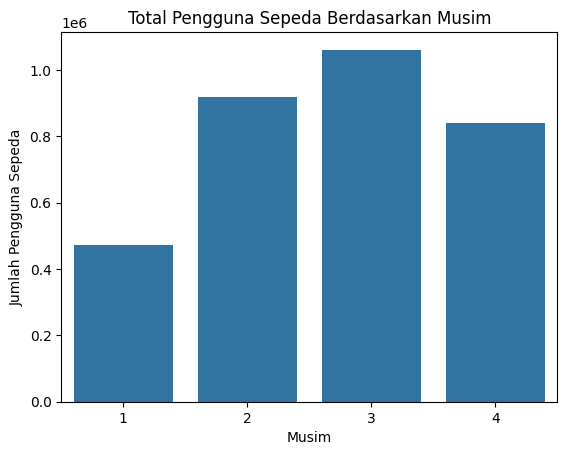

In [39]:
sns.barplot(x = 'season', y = 'cnt', data = season_usage)
plt.title('Total Pengguna Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 2:

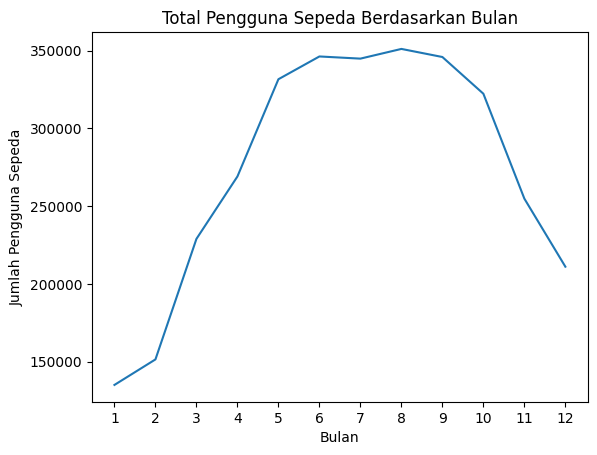

In [47]:
sns.lineplot(x='mnth', y='cnt', data=month_usage)
plt.title('Total Pengguna Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(ticks=range(1, 13))
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi grfik histogram, penyewaan sepeda paling banyak terjadi pada musim ke 3, yaitu musim gugur.
- Berdasarkan hasil visualisasi line chart, penyewaan sepeda paling banyak terjadi pada bulan ke 8.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2